In [1]:
import sklearn
import pandas as pd
from matplotlib import cm
import numpy as np

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
len(dataset.target)

150

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(dataset.data, random_state=0)
y_train, y_test = train_test_split(dataset.target, random_state=0)

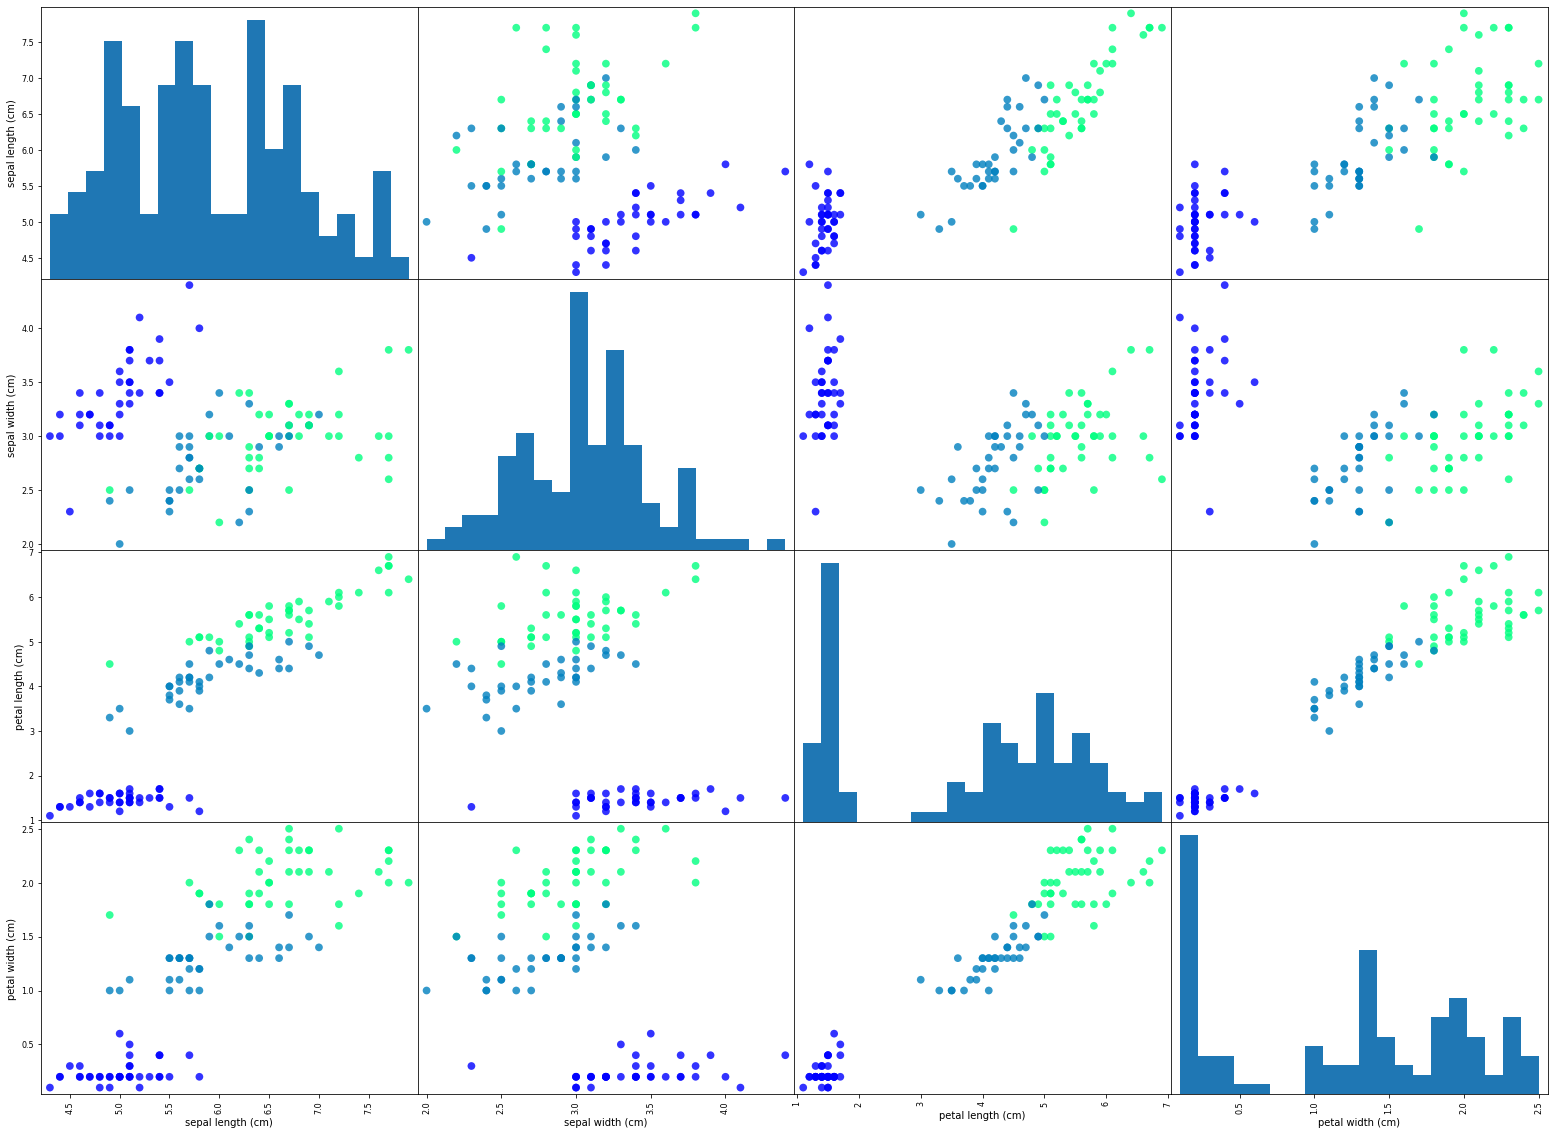

In [7]:
iris_dtfm = pd.DataFrame(x_train, columns=dataset.feature_names)
grr = pd.plotting.scatter_matrix(
    iris_dtfm,
    figsize=(27,20),
    c=y_train,
    cmap=cm.get_cmap('winter'),
    marker='o',
    alpha=.8,
    hist_kwds={'bins': 20},
    s=60
    )
# We can see that the 3 species are almost seperatable, so it should be ez for the algorithm within KNeighborsClassifier class to make a prediction.

# k-nearest Neightbors: make a prediction for a new data point
### the algorithm finds the point in the training set that is closest to the new point
### Then it assigns the label of this training point to the new data point

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
x_new = np.array([[5,2.9,1,.2]])

In [12]:
prediction = knn.predict(x_new)
print("Prediction: ",prediction)
print("Predicted target name: ",dataset.target_names[prediction])

Prediction:  [0]
Predicted target name:  ['setosa']


In [14]:
y_pred = knn.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [17]:
knn.score(x_test,y_test)

0.9736842105263158

In [23]:
np.mean(y_pred == y_test)

0.9736842105263158

# Uncertainty in multiclass

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(dataset.data, random_state=42)
y_train, y_test = train_test_split(dataset.target, random_state=42)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate=.01, random_state=0).fit(x_train,y_train)

In [12]:
gbrt.decision_function(x_test)[:5,:]

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483]])

In [14]:
print(np.argmax(gbrt.decision_function(x_test), axis=1))
print(gbrt.predict(x_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [18]:
gbrt.predict_proba(x_test)[:5]

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094]])

In [19]:
print(np.argmax(gbrt.predict_proba(x_test), axis=1))
print(gbrt.predict(x_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [20]:
gbrt.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [28]:
temp = np.argmax(gbrt.decision_function(x_test), axis=1)
dataset.target_names[temp]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')